#  Data Wrangling Project

# WE RATE DOGS 

Data Wrangling of we Rate dogs twiter Archive


In [122]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt

Gather

In [123]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv' , sep = ',')

In [124]:
#programatically downloading the data.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

# Read in tsv file as a Pandas DataFrame    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')


In [5]:
# Getting DATA of retweets / retweet count id from tweepy

consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)


api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

if (not api):
    print ("Can't Authenticate")







In [261]:
# each tweet as new line in JSON text hence parsing via tweet_id
with open('tweet_json.txt', 'a', encoding='utf8') as fi:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, fi)
            fi.write('\n')
        except:
            continue            
    

Rate limit reached. Sleeping for: 100


In [7]:
# For loop to append each tweet into a list
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [8]:
tweet_info = pd.DataFrame()


In [9]:
# Add selected variables to tweet_info DataFrame
tweet_info['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

In [10]:


tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 3 columns):
id                2336 non-null int64
retweet_count     2336 non-null int64
favorite_count    2336 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


# Acsses

In [125]:
twitter_archive.head()



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


.source contains to much infi and is unreadable
.text column visibility

In [126]:
twitter_archive.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

wrongly assigned data types for timestamp , tweet_id etc

In [127]:
twitter_archive.describe()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [128]:
twitter_archive.sample(5)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687239008257/photo/1,11,10,a,None,None,None,None
1454,695446424020918272,NaN,NaN,2016-02-05 03:18:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We normally don't rate unicorns but this one has 3 ears so it must be super rare. 12/10 majestic af https://t.co/f9qlKiv39T,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695446424020918272/photo/1,12,10,None,None,None,None,None
1151,725842289046749185,NaN,NaN,2016-04-29 00:21:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Colby. He's currently regretting all those times he shook your hand for an extra treat. 12/10 https://t.co/vtVHtKFtBH,NaN,NaN,NaN,https://twitter.com/dog_rates/status/725842289046749185/photo/1,12,10,Colby,None,None,None,None
1198,716802964044845056,NaN,NaN,2016-04-04 01:41:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Link. He struggles with couches. 10/10 would assist https://t.co/SbX4e6Yg3o,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/716802964044845056/photo/1,https://twitter.com/dog_rates/status/716802964044845056/photo/1",10,10,Link,None,None,None,None
761,778286810187399168,NaN,NaN,2016-09-20 17:36:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stanley. He has too much skin. Isn't happy about it. Quite pupset actually. Still 11/10 would comfort https://t.co/hhTfnPrWfb,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/778286810187399168/photo/1,https://twitter.com/dog_rates/status/778286810187399168/photo/1",11,10,Stanley,None,None,None,None


In [129]:
twitter_archive.name.sort_values()

1035    Abby        
1021    Abby        
938     Ace         
1933    Acro        
1327    Adele       
1934    Aiden       
77      Aja         
480     Akumi       
820     Al          
875     Albert      
1954    Albert      
144     Albus       
412     Albus       
1115    Aldrick     
2046    Alejandro   
374     Alexander   
1189    Alexanderson
486     Alf         
2238    Alfie       
661     Alfie       
367     Alfie       
1616    Alfie       
858     Alfie       
51      Alfy        
201     Alice       
1701    Alice       
1495    Amber       
1334    Ambrose     
2078    Amy         
2195    Amélie      
         ...        
852     my          
988     not         
335     not         
1747    officially  
1206    old         
993     one         
1936    one         
924     one         
369     one         
2326    quite       
169     quite       
118     quite       
193     quite       
2030    space       
22      such        
2345    the         
2346    the  

. Inconsistant names 

In [130]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [131]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [132]:
image_predictions['img_num']

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
2045    1
2046    1
2047    1
2048    2
2049    1
2050    1
2051    2
2052    1
2053    1
2054    1
2055    2
2056    3
2057    1
2058    1
2059    1
2060    1
2061    1
2062    1
2063    1
2064    1
2065    1
2066    1
2067    2
2068    1
2069    1
2070    2
2071    1
2072    1
2073    1
2074    1
Name: img_num, Length: 2075, dtype: int64

# issues<br>
1. Tidiness<br>
. many columns like doggo , floofer ,pupper , puppo essentialy desc the same thing(dog stage)  and should be in a single var named dog_attribute <br>
. Join tweet_info , image_pridiction  to tweet_archive<br>
.Get rid of retweeted_status_id	retweeted_status_user_id  retweeted_status_timestamp<br>
<br>
2. Quality<br>
. Get rid of rows with expanded urls as NaN<br>
.Dogs names are inconsistant(first letter not caps or wrongly named)<br>
.Display full contents of the text column<br>
. Dog names in case not there should be NaN not None<br>
.Data contain retweets(will take care in tidiness last part)<br>
.source rendered as html tags<br>
.ratings must have decimal value where required<br>
.fix incorrect ratings <br>
.make rating numerator as float<br> 
.Errorneous Data types (timestamp , tweet_id , in_reply_to_status_id , in_reply_to_user_id )
 

# <u>clean</u>

In [133]:
tw_arch_clean = twitter_archive.copy()
img_clean = image_predictions.copy()
tw_info_clean = tweet_info.copy()


1)
issue: Many columns like doggo , floofer ,pupper , puppo essentialy desc the same thing and should be in a single var named "dog_attribute"

define: make columns doggo , floofer ,pupper , puppo as dog_attribute

Code

In [134]:
# first make vcolumn dog_attribute then extract the values from text into it then drop the extra columns
tw_arch_clean['dog_attribute'] = tw_arch_clean['text'].str.extract('(doggo | floofer | pupper | puppo)',expand = True)

# Drop extra columns
columns = ['doggo', 'floofer', 'pupper', 'puppo']
tw_arch_clean = tw_arch_clean.drop(columns, axis=1)




Test

In [135]:
tw_arch_clean.head(15)



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_attribute
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a c

2)
issue: image_pridictions , tweet_info and tweet_archive should be one table

define: Join tweet_info , image_pridiction  to tweet_archive

Code

In [136]:
# first join tweet_info and tweet_archive using innerjoin with tweet_id
tw_arch_clean = pd.merge(left=tw_arch_clean, right=tw_info_clean, left_on='tweet_id', right_on='id', how='inner')

# image pridiction with tweet_archive
tw_arch_clean = tw_arch_clean.merge(img_clean, on='tweet_id', how='inner')


# Drop extra columns(id from tweet info)

tw_arch_clean = tw_arch_clean.drop('id' , axis = 1)





test

In [138]:
tw_arch_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060 entries, 0 to 2059
Data columns (total 27 columns):
tweet_id                      2060 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2060 non-null object
source                        2060 non-null object
text                          2060 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2060 non-null object
rating_numerator              2060 non-null int64
rating_denominator            2060 non-null int64
name                          2060 non-null object
dog_attribute                 226 non-null object
retweet_count                 2060 non-null int64
favorite_count                2060 non-null int64
jpg_url                       2060 non-null object
img_num                       2060 non

3)
issue: we dont need retweets data.

define: Get rid of retweets

Code

In [139]:
tw_arch_clean = tw_arch_clean [tw_arch_clean['retweeted_status_id'].isnull()] 


Test

In [140]:
tw_arch_clean.info() # all the retweets are deleted because the retweeted_status_id has all nulls

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 2059
Data columns (total 27 columns):
tweet_id                      1985 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1985 non-null object
source                        1985 non-null object
text                          1985 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1985 non-null object
rating_numerator              1985 non-null int64
rating_denominator            1985 non-null int64
name                          1985 non-null object
dog_attribute                 216 non-null object
retweet_count                 1985 non-null int64
favorite_count                1985 non-null int64
jpg_url                       1985 non-null object
img_num                       1985 non-nu

4)
issue: we dont need retweets columns and data (all are null now due to above operaation).

define: Get rid of retweets related columns

Code

In [141]:
columns_a = ['retweeted_status_id' , 'retweeted_status_user_id' , 'retweeted_status_timestamp']
tw_arch_clean = tw_arch_clean.drop(columns_a, axis=1)



Test

In [142]:
tw_arch_clean.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 2059
Data columns (total 24 columns):
tweet_id                 1985 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1985 non-null object
source                   1985 non-null object
text                     1985 non-null object
expanded_urls            1985 non-null object
rating_numerator         1985 non-null int64
rating_denominator       1985 non-null int64
name                     1985 non-null object
dog_attribute            216 non-null object
retweet_count            1985 non-null int64
favorite_count           1985 non-null int64
jpg_url                  1985 non-null object
img_num                  1985 non-null int64
p1                       1985 non-null object
p1_conf                  1985 non-null float64
p1_dog                   1985 non-null bool
p2                       1985 non-null object
p2_conf                  1985

5)
issue: we dont need tweets with no image.

define: Get rid of columns with NaN as expanded URLs

Code

In [143]:

tw_arch_clean = tw_arch_clean.dropna(subset = ['expanded_urls'] )



Test

In [144]:


sum(tw_arch_clean['expanded_urls'].isnull())
#all are false ie. no null in expanded urls hence 0 false is the sum


0

6)
issue: Dogs names are inconsistant

define: Correct the dog names.

Code

In [145]:
# name lowercase + text contain name is
name_a = tw_arch_clean.loc[(tw_arch_clean['name'].str.islower()) & (tw_arch_clean['text'].str.contains('name is'))]

# name lowercase + text contain named
name_b = tw_arch_clean.loc[(tw_arch_clean['name'].str.islower()) & (tw_arch_clean['text'].str.contains('named'))]

# name lowercase (covers th rest)
name_c = tw_arch_clean.loc[(tw_arch_clean['name'].str.islower())]





In [146]:
#make list of text for above names. then iterate and place right names
name_a_list = name_a['text'].tolist()
name_b_list = name_b['text'].tolist()
name_c_list = name_c['text'].tolist()

#iterate

for name in name_a_list:
    find = (tw_arch_clean.text == name)
    tw_arch_clean.loc[find, 'name'] = re.findall(r"name is\s(\w+)", name)

for name in name_b_list:
    find = (tw_arch_clean.text == name)
    tw_arch_clean.loc[find, 'name'] = re.findall(r"named\s(\w+)", name)

for name in name_c_list:
    find = (tw_arch_clean.text == name)
    tw_arch_clean.loc[find, 'name'] = "None" ;



Test

In [147]:



tw_arch_clean['name'].sort_values()


832     Abby        
843     Abby        
764     Ace         
1652    Acro        
1105    Adele       
1653    Aiden       
66      Aja         
379     Akumi       
659     Al          
707     Albert      
1672    Albert      
119     Albus       
324     Albus       
915     Aldrick     
1763    Alejandro   
294     Alexander   
987     Alexanderson
384     Alf         
1360    Alfie       
691     Alfie       
287     Alfie       
1952    Alfie       
46      Alfy        
1437    Alice       
159     Alice       
1255    Amber       
1112    Ambrose     
1795    Amy         
1910    Amélie      
624     Anakin      
         ...        
451     Winnie      
631     Winnie      
448     Winston     
320     Winston     
1554    Winston     
804     Winston     
222     Winston     
1850    Winston     
656     Winston     
1032    Winston     
709     Wishes      
322     Wyatt       
143     Wyatt       
1217    Wyatt       
1151    Yoda        
38      Yogi        
492     Yogi 

7)
issue:  Display full contents of the text column

define: display full text column

Code

In [148]:

pd.set_option('display.max_colwidth', -1)


Test

In [149]:
tw_arch_clean.sample(15)




,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1133,703407252292673536,NaN,NaN,2016-02-27 02:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pupper doesn't understand gates. 10/10 so close https://t.co/GUbFF4o6dZ,https://twitter.com/dog_rates/status/703407252292673536/photo/1,10,10,None,...,1,doormat,0.201058,False,turnstile,0.088583,False,carton,0.082924,False
91,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,"https://twitter.com/dog_rates/status/871515927908634625/photo/1,https://twitter.com/dog_rates/status/871515927908634625/photo/1",12,10,Napolean,...,2,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False
1645,674053186244734976,NaN,NaN,2015-12-08 02:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Stanley. Yes he is aware of the spoon's presence, he just doesn't know what he should do about it. 10/10 https://t.co/gQAMg5ypW5",https://twitter.com/dog_rates/status/674053186244734976/photo/1,10,10,Stanley,...,1,Cardigan,0.984725,True,Pembroke,0.008730,True,kelpie,0.002195,True
792,750071704093859840,NaN,NaN,2016-07-04 21:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Pause your cookout and admire this pupper's nifty hat. 10/10 https://t.co/RG4C9IdNJM,"https://twitter.com/dog_rates/status/750071704093859840/photo/1,https://twitter.com/dog_rates/status/750071704093859840/photo/1,https://twitter.com/dog_rates/status/750071704093859840/photo/1",10,10,None,...,2,redbone,0.382113,True,malinois,0.249943,True,miniature_pinscher,0.070926,True
334,821765923262631936,NaN,NaN,2017-01-18 17:07:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Duchess. She uses dark doggo forces to levitate her toys. 13/10 magical af https://t.co/maDNMETA52,https://twitter.com/dog_rates/status/821765923262631936/photo/1,13,10,Duchess,...,1,golden_retriever,0.980071,True,Labrador_retriever,0.008758,True,Saluki,0.001806,True
1367,684880619965411328,NaN,NaN,2016-01-06 23:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a basking dino pupper. Looks powerful. Occasionally shits eggs. Doesn't want the holidays to end. 5/10 https://t.co/DnNweb5eTO,https://twitter.com/dog_rates/status/684880619965411328/photo/1,5,10,None,...,1,clog,0.081101,False,spindle,0.066957,False,agama,0.060884,False
1514,677644091929329666,NaN,NaN,2015-12-18 00:18:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a dog swinging. I really enjoyed it so I hope you all do as well. 11/10 https://t.co/Ozo9KHTRND,https://twitter.com/dog_rates/status/677644091929329666/video/1,11,10,None,...,1,Chihuahua,0.626236,True,Italian_greyhound,0.128483,True,swing,0.059840,False
1764,671518598289059840,NaN,NaN,2015-12-01 02:38:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Scruffers. He's being violated on multiple levels and is not happy about it. 9/10 hang in there Scruffers https://t.co/nLQoltwEZ7,https://twitter.com/dog_rates/status/671518598289059840/photo/1,9,10,Scruffers,...,1,Lakeland_terrier,0.428275,True,wire-haired_fox_terrier,0.111472,True,toy_poodle,0.105016,True
1914,668779399630725120,NaN,NaN,2015-11-23 13:13:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kevon. He is not physically or mentally prepared to start his Monda

8)
issue:  Dog names in case not there should be NaN not None

define: give NaN if dog name is None

Code

In [150]:
tw_arch_clean['name'] = tw_arch_clean['name'].replace('None' , np.NaN)


Test

In [151]:
tw_arch_clean.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 2059
Data columns (total 24 columns):
tweet_id                 1985 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1985 non-null object
source                   1985 non-null object
text                     1985 non-null object
expanded_urls            1985 non-null object
rating_numerator         1985 non-null int64
rating_denominator       1985 non-null int64
name                     1349 non-null object
dog_attribute            216 non-null object
retweet_count            1985 non-null int64
favorite_count           1985 non-null int64
jpg_url                  1985 non-null object
img_num                  1985 non-null int64
p1                       1985 non-null object
p1_conf                  1985 non-null float64
p1_dog                   1985 non-null bool
p2                       1985 non-null object
p2_conf                  1985

9)
issue:  source rendered as html tags with full url

define: get rid of un necessary data from source.

Code

In [152]:
tw_arch_clean['source'] = tw_arch_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')

tw_arch_clean['source'] = tw_arch_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')

tw_arch_clean['source'] = tw_arch_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter for Web Client')


tw_arch_clean['source'] = tw_arch_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

Test

In [153]:
tw_arch_clean.source.value_counts()

Twitter for iPhone        1946
Twitter for Web Client    28  
TweetDeck                 11  
Name: source, dtype: int64

10)
issue:  resolve rating issues.

define : change ratings numerator  to correct ratings

Code

In [154]:
tw_arch_clean[tw_arch_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
40,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,...,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
553,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
609,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,...,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
1447,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,NaN,...,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


In [155]:
rate = tw_arch_clean.loc[ (tw_arch_clean['text'].str.contains(r"(\d+\.\d*\/\d+)"))]

#rate_a
rate_list = rate['text'].tolist()

for rate in rate_list:
    find = (tw_arch_clean.text == rate)
    tw_arch_clean.loc[find, 'rating_numerator'] = re.findall(r"(\d+\.\d+)", rate)



C:\Users\ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


Test

In [156]:

tw_arch_clean[tw_arch_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
40,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.5,10,Bella,...,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
553,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
609,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10,Sophie,...,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
1447,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10,NaN,...,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


11)
issue:  resolve rating issues.

define : fix ratings which are not right values due to more than one numerator/denominator in text

Code

In [157]:
tw_arch_clean[tw_arch_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")]

C:\Users\ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
611,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,Twitter for iPhone,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",https://twitter.com/dog_rates/status/777684233540206592/photo/1,12,10,NaN,...,1,cocker_spaniel,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True
821,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,Twitter for iPhone,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",10,10,Bookstore,...,1,Chesapeake_Bay_retriever,0.804363,True,Weimaraner,0.054431,True,Labrador_retriever,0.043268,True
872,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,NaN,...,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
963,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,NaN,...,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
997,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,...,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1013,714258258790387713,NaN,NaN,2016-03-28 01:10:13 +0000,Twitter for iPhone,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,https://twitter.com/dog_rates/status/714258258790387713/photo/1,10,10,Travis,...,1,collie,0.176758,True,Chesapeake_Bay_retriever,0.101834,True,beagle,0.101294,True
1135,703356393781329922,NaN,NaN,2016-02-26 23:10:06 +0000,Twitter for iPhone,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,https://twitter.com/dog_rates/status/703356393781329922/photo/1,9,10,Socks,...,1,Border_collie,0.894842,True,collie,0.097364,True,English_springer,0.003037,True
1225,695064344191721472,NaN,NaN,2016-02-04 02:00:27 +0000,Twitter for iPhone,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",https://twitter.com/dog_rates/status/695064344191721472/video/1,4,10,NaN,...,1,seat_belt,0.522211,False,sunglasses,0.077552,False,ice_lolly,0.051774,False
1230,694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,"https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1",10,10,Oliviér,...,2,Australian_terrier,0.407886,True,Yorkshire_terrier,0.328173,True,silky_terrier,0.108404,True
1265,6914830413242

In [158]:
rate_fix = tw_arch_clean.loc[ ( tw_arch_clean['text'].str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")) ]


C:\Users\ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [159]:
rate_fix_list =  rate_fix['text'].tolist()
#denominator is always 10 as ratings are in the form #/10

for rate in rate_fix_list:
    find = (tw_arch_clean.text == rate)
    tw_arch_clean.loc[find, 'rating_numerator'] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", rate)
    tw_arch_clean.loc[find, 'rating_denominator'] = 10


Test

In [160]:

tw_arch_clean[tw_arch_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")]

C:\Users\ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
611,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,Twitter for iPhone,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",https://twitter.com/dog_rates/status/777684233540206592/photo/1,11,10,NaN,...,1,cocker_spaniel,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True
821,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,Twitter for iPhone,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",7,10,Bookstore,...,1,Chesapeake_Bay_retriever,0.804363,True,Weimaraner,0.054431,True,Labrador_retriever,0.043268,True
872,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14,10,NaN,...,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
963,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13,10,NaN,...,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
997,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11,10,Bluebert,...,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1013,714258258790387713,NaN,NaN,2016-03-28 01:10:13 +0000,Twitter for iPhone,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,https://twitter.com/dog_rates/status/714258258790387713/photo/1,8,10,Travis,...,1,collie,0.176758,True,Chesapeake_Bay_retriever,0.101834,True,beagle,0.101294,True
1135,703356393781329922,NaN,NaN,2016-02-26 23:10:06 +0000,Twitter for iPhone,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,https://twitter.com/dog_rates/status/703356393781329922/photo/1,2,10,Socks,...,1,Border_collie,0.894842,True,collie,0.097364,True,English_springer,0.003037,True
1225,695064344191721472,NaN,NaN,2016-02-04 02:00:27 +0000,Twitter for iPhone,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",https://twitter.com/dog_rates/status/695064344191721472/video/1,13,10,NaN,...,1,seat_belt,0.522211,False,sunglasses,0.077552,False,ice_lolly,0.051774,False
1230,694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,"https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1",5,10,Oliviér,...,2,Australian_terrier,0.407886,True,Yorkshire_terrier,0.328173,True,silky_terrier,0.108404,True
1265,6914830413242

. Displaying &amp; which is simply & (issue to fix)

In [161]:
tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 2059
Data columns (total 24 columns):
tweet_id                 1985 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1985 non-null object
source                   1985 non-null object
text                     1985 non-null object
expanded_urls            1985 non-null object
rating_numerator         1985 non-null object
rating_denominator       1985 non-null int64
name                     1349 non-null object
dog_attribute            216 non-null object
retweet_count            1985 non-null int64
favorite_count           1985 non-null int64
jpg_url                  1985 non-null object
img_num                  1985 non-null int64
p1                       1985 non-null object
p1_conf                  1985 non-null float64
p1_dog                   1985 non-null bool
p2                       1985 non-null object
p2_conf                  198

12) 
issue:  resolve rating issues.

define : change ratings numerator  to float type

Code

In [162]:
tw_arch_clean['rating_numerator'] = tw_arch_clean['rating_numerator'].astype('float')
tw_arch_clean['rating_denominator'] = tw_arch_clean['rating_denominator'].astype('float')

Test

In [163]:

tw_arch_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1233,694183373896572928,NaN,NaN,2016-02-01 15:39:48 +0000,Twitter for iPhone,This is Lola. She realized mid hug that she's not ready for a committed relationship with a teddy bear. 9/10 https://t.co/pVebzwRioD,"https://twitter.com/dog_rates/status/694183373896572928/photo/1,https://twitter.com/dog_rates/status/694183373896572928/photo/1",9.0,10.0,Lola,...,1,teddy,0.441499,False,Pekinese,0.08087,True,Shih-Tzu,0.072099,True


In [164]:
tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 2059
Data columns (total 24 columns):
tweet_id                 1985 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1985 non-null object
source                   1985 non-null object
text                     1985 non-null object
expanded_urls            1985 non-null object
rating_numerator         1985 non-null float64
rating_denominator       1985 non-null float64
name                     1349 non-null object
dog_attribute            216 non-null object
retweet_count            1985 non-null int64
favorite_count           1985 non-null int64
jpg_url                  1985 non-null object
img_num                  1985 non-null int64
p1                       1985 non-null object
p1_conf                  1985 non-null float64
p1_dog                   1985 non-null bool
p2                       1985 non-null object
p2_conf                  

13)
issue:Errorneous Data types (timestamp , tweet_id , in_reply_to_status_id , in_reply_to_user_id  , dog_attribute )

define : fix errorneous data types

Code

In [165]:

tw_arch_clean['timestamp'] = pd.to_datetime(tw_arch_clean['timestamp'])
tw_arch_clean['tweet_id'] = tw_arch_clean['tweet_id'].astype('str')
tw_arch_clean['in_reply_to_status_id'] = tw_arch_clean['in_reply_to_status_id'].astype('str')
tw_arch_clean['in_reply_to_user_id'] = tw_arch_clean['in_reply_to_user_id'].astype('str')
tw_arch_clean['dog_attribute'] = tw_arch_clean['dog_attribute'].astype('category')

Test

In [166]:
tw_arch_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
436,805932879469572096,nan,nan,2016-12-06 00:32:26,Twitter for iPhone,This is Major. He put on a tie for his first real walk. Only a little crooked. Can also drool upwards. H*ckin talented. 12/10 https://t.co/Zcwr8LgoO8,https://twitter.com/dog_rates/status/805932879469572096/photo/1,12.0,10.0,Major,...,1,Norwegian_elkhound,0.657967,True,keeshond,0.319136,True,Leonberg,0.007947,True


In [167]:

tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 2059
Data columns (total 24 columns):
tweet_id                 1985 non-null object
in_reply_to_status_id    1985 non-null object
in_reply_to_user_id      1985 non-null object
timestamp                1985 non-null datetime64[ns]
source                   1985 non-null object
text                     1985 non-null object
expanded_urls            1985 non-null object
rating_numerator         1985 non-null float64
rating_denominator       1985 non-null float64
name                     1349 non-null object
dog_attribute            216 non-null category
retweet_count            1985 non-null int64
favorite_count           1985 non-null int64
jpg_url                  1985 non-null object
img_num                  1985 non-null int64
p1                       1985 non-null object
p1_conf                  1985 non-null float64
p1_dog                   1985 non-null bool
p2                       1985 non-null object
p2_conf     

In [168]:
tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 2059
Data columns (total 24 columns):
tweet_id                 1985 non-null object
in_reply_to_status_id    1985 non-null object
in_reply_to_user_id      1985 non-null object
timestamp                1985 non-null datetime64[ns]
source                   1985 non-null object
text                     1985 non-null object
expanded_urls            1985 non-null object
rating_numerator         1985 non-null float64
rating_denominator       1985 non-null float64
name                     1349 non-null object
dog_attribute            216 non-null category
retweet_count            1985 non-null int64
favorite_count           1985 non-null int64
jpg_url                  1985 non-null object
img_num                  1985 non-null int64
p1                       1985 non-null object
p1_conf                  1985 non-null float64
p1_dog                   1985 non-null bool
p2                       1985 non-null object
p2_conf     

14)
issue:  Displaying &amp; which is simply &

define : replace & with &amp;  

Code

In [169]:
tw_arch_clean['text'] = tw_arch_clean['text'].str.replace('&amp;', '&')

Test

In [170]:
sum(tw_arch_clean['text'].str.contains('&amp;'))

0

## SAVE

In [171]:
tw_arch_clean.to_csv('twitter_archive_master.csv')


## Analyze

In [172]:
df = tw_arch_clean[['timestamp', 'retweet_count', 
                            'favorite_count', 'rating_numerator', 'rating_denominator', 'expanded_urls']].copy()

In [173]:
# making a rating colum to normalize
df['ratio'] = df['rating_numerator'] / df['rating_denominator']
df.set_index('timestamp', inplace=True)

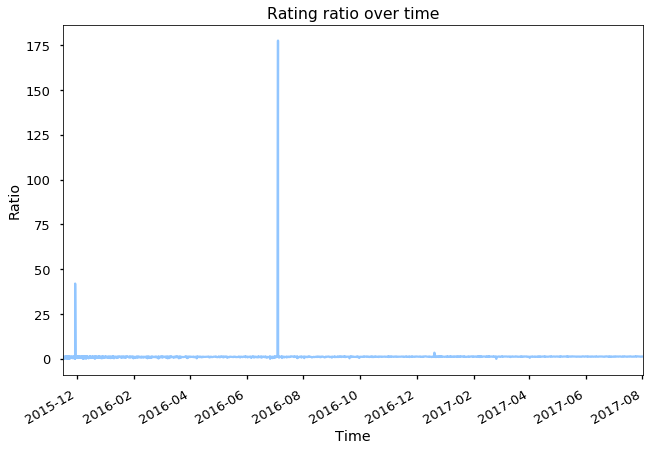

In [174]:

df['ratio'].plot()
plt.style.use('seaborn-talk')
plt.xlabel('Time')
plt.ylabel('Ratio')
plt.title('Rating ratio over time')
plt.savefig('ratio.png')
plt.show()
#there are two outliers .

In [175]:
# removing outliers for a better view
df = df[df.ratio < 25] 



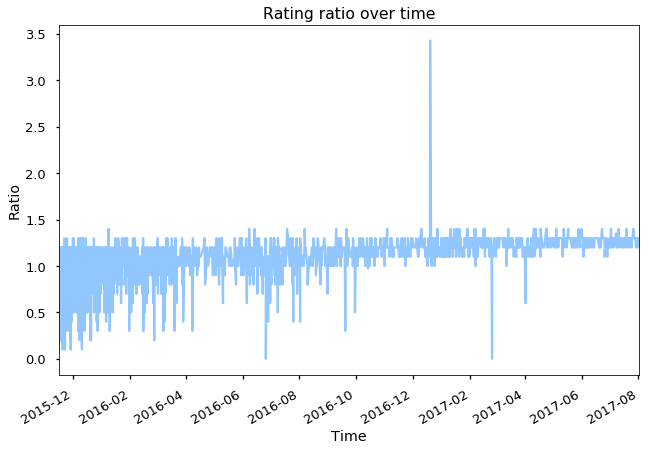

In [176]:
df['ratio'].plot()
plt.xlabel('Time')
plt.ylabel('Ratio')
plt.title('Rating ratio over time')
plt.savefig('ratio_1.png')
plt.show()



In [178]:
#here also there is an outlier which is acuatually an wrong rating_numerator 
df[df.ratio > 3]


,retweet_count,favorite_count,rating_numerator,rating_denominator,expanded_urls,ratio
timestamp,,,,,,
2016-12-19 23:06:23,1617,5845,24.0,7.0,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",3.428571


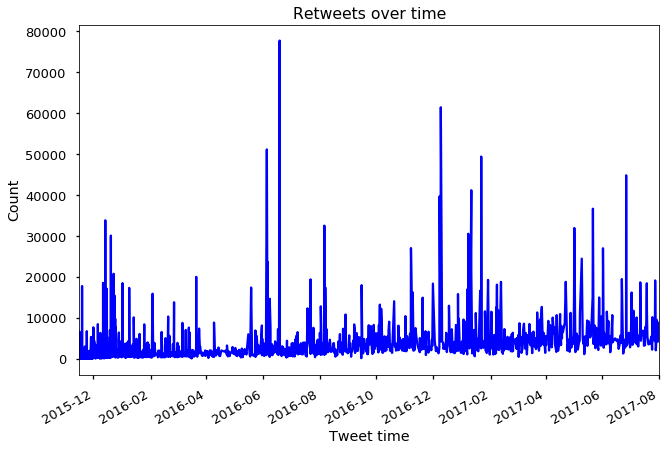

In [179]:

df['retweet_count'].plot(color = 'blue', label='Retweets')
plt.xlabel('Tweet time')
plt.ylabel('Count')
plt.title('Retweets over time')
plt.savefig('retweet.png')
plt.show()



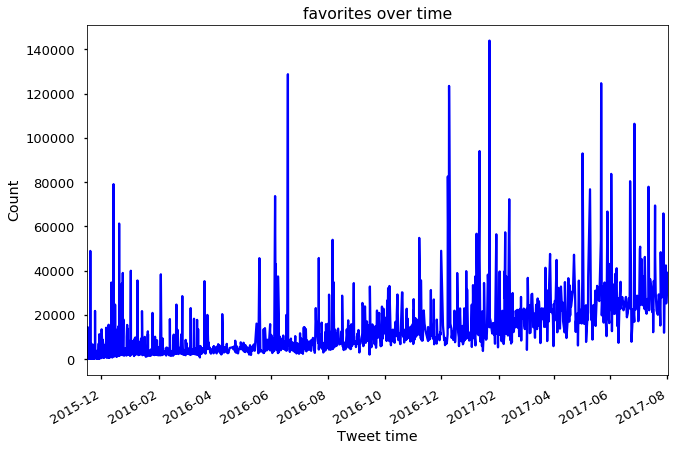

In [180]:
df['favorite_count'].plot(color = 'blue', label='favorite')
plt.xlabel('Tweet time')
plt.ylabel('Count')
plt.title('favorites over time')
plt.savefig('favorites.png')
plt.show()

